# Machine Learning Assignment Homework 1: Linear Models

## Introduction
In this notebook, we will create two regression based models to assess air quality.  
The target variable is the hourly averaged sensor response for CO.  
The notebook will cover the following steps:
- Data Processing
- Exploratory Data Analysis
- Linear Regression Implementation
- Logistic Regression Implementation
- Result Analysis - Linear Regression
- Result Analysis - Logistic Regression
- ROC Curve - Logistic Regression
- Inference - Linear and Logistic Regression

## (a) Data Processing

### Data Loading and Cleaning

In [137]:
import os
import pandas as pd

# Current working directory
cwd = os.getcwd()

# Relative paths
data_train_path = os.path.join(cwd, '..', 'data', 'data_train.csv')
data_test_path = os.path.join(cwd, '..', 'data', 'data_test.csv')

# Load the training data
data_train = pd.read_csv(data_train_path)

# Load the test data
data_test = pd.read_csv(data_test_path)

I used the `pandas` library and the `read_csv` function to load the train and test datasets.

In [138]:
# Display the first 5 rows
data_train.head()

,Unnamed: 0,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0,797.0,-200.0,2.1,593.0,146.0,1212.0,72.0,984.0,494.0,10.8,49.7,0.6429
1,1,1282.0,-200.0,11.0,1013.0,354.0,545.0,141.0,1384.0,1287.0,17.4,50.6,0.9989
2,2,891.0,-200.0,7.6,882.0,342.0,885.0,149.0,950.0,894.0,7.8,33.9,0.3594
3,3,1285.0,-200.0,18.1,1243.0,481.0,599.0,173.0,1815.0,1582.0,26.4,41.9,1.4237
4,4,892.0,-200.0,7.3,869.0,71.0,953.0,77.0,1363.0,632.0,37.4,14.7,0.9295


In [139]:
# Print the shape of the training dataframe
print(f"\nShape of the training data: {data_train.shape}")
print(f"Column names: {data_train.columns.to_list()}")


Shape of the training data: (6250, 13)
Column names: ['Unnamed: 0', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


### Data Overview
The training data has 6250 rows and 13 columns.  
Each row of the data corresponds to a sample and columns denote the features.  
The column named `Unnamed: 0` just contains the index of the rows and will not be a part of our training data.  
So we have 11 columns representing features and 1 column representing the label (Target Variable: `PT08.S1(CO)`)  
The 12 columns in our training data denote the following:
1. `NMHC(GT)`: hourly averaged overall Non Metanic HydroCarbons concentration in microg/m3
2. `C6H6(GT)`: hourly averaged Benzene concentration in microg/m3
3. `PT08.S2(NMHC)`: hourly averaged sensor response to NMHC
4. `NOx(GT)`: hourly averaged NOx concentration in ppb
5. `PT08.S3(NOx)`: hourly averaged sensor response for NOx
6. `NO2(GT)`: hourly averaged NO2 concentration in microg/m3
7. `PT08.S4(NO2)`: hourly averaged sensor response for NO2
8. `PT08.S5(O3)`: hourly averaged sensor response for O3
9. `T`: Temperature in C
10. `RH`: Relative Humidity
11. `AH`: Absolute Humidity
12. `PT08.S1(CO)`: **TARGET VARIABLE** - hourly averaged sensor response for CO

##### Data Cleaning

In [140]:
# Drop the 'Unnamed: 0' index column
data_train.drop(columns=['Unnamed: 0'], inplace=True)
data_test.drop(columns=['Unnamed: 0'], inplace=True)

# Check for missing values
missing_values = data_train.isnull().sum()
print("Number of missing values for each column in the training data:")
print(missing_values)
print(f"\nTotal number of missing values in the dataset: {missing_values.sum()}")

Number of missing values for each column in the training data:
PT08.S1(CO)      77
NMHC(GT)         77
C6H6(GT)         77
PT08.S2(NMHC)    77
NOx(GT)          77
PT08.S3(NOx)     77
NO2(GT)          77
PT08.S4(NO2)     77
PT08.S5(O3)      77
T                77
RH               77
AH               77
dtype: int64

Total number of missing values in the dataset: 924


In [141]:
# Drop rows with missing data in original dataframe using inplace=True
data_train.dropna(inplace=True)
print(f"Shape after dropping missing data: {data_train.shape}")

# Filling the missing value in the test data with the mean of the remaining values
data_test.fillna(data_test.mean(), inplace=True)


Shape after dropping missing data: (6173, 12)


I did not drop the missing values in the test data because then the number of predicted test ourcomes will be less than the number of test samples which doesn't make sense. Instead, for each column, I filled the missing values with the mean of that column.

##### Feature and Label Extraction

In [142]:
# Extract the features and the label
X_train = data_train.drop(columns=['PT08.S1(CO)'], inplace=False)
y_train = data_train['PT08.S1(CO)']
X_test = data_test

print(f"Features: {X_train.columns.tolist()}")
print(f"Label: {y_train.name}")

Features: ['NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
Label: PT08.S1(CO)


The features include all columns except the target variable `PT08.S1(CO)`.  
The target variable represents the hourly averaged sensor response for CO, which we aim to predict using regression models.

## (b) Exploratory Data Analysis

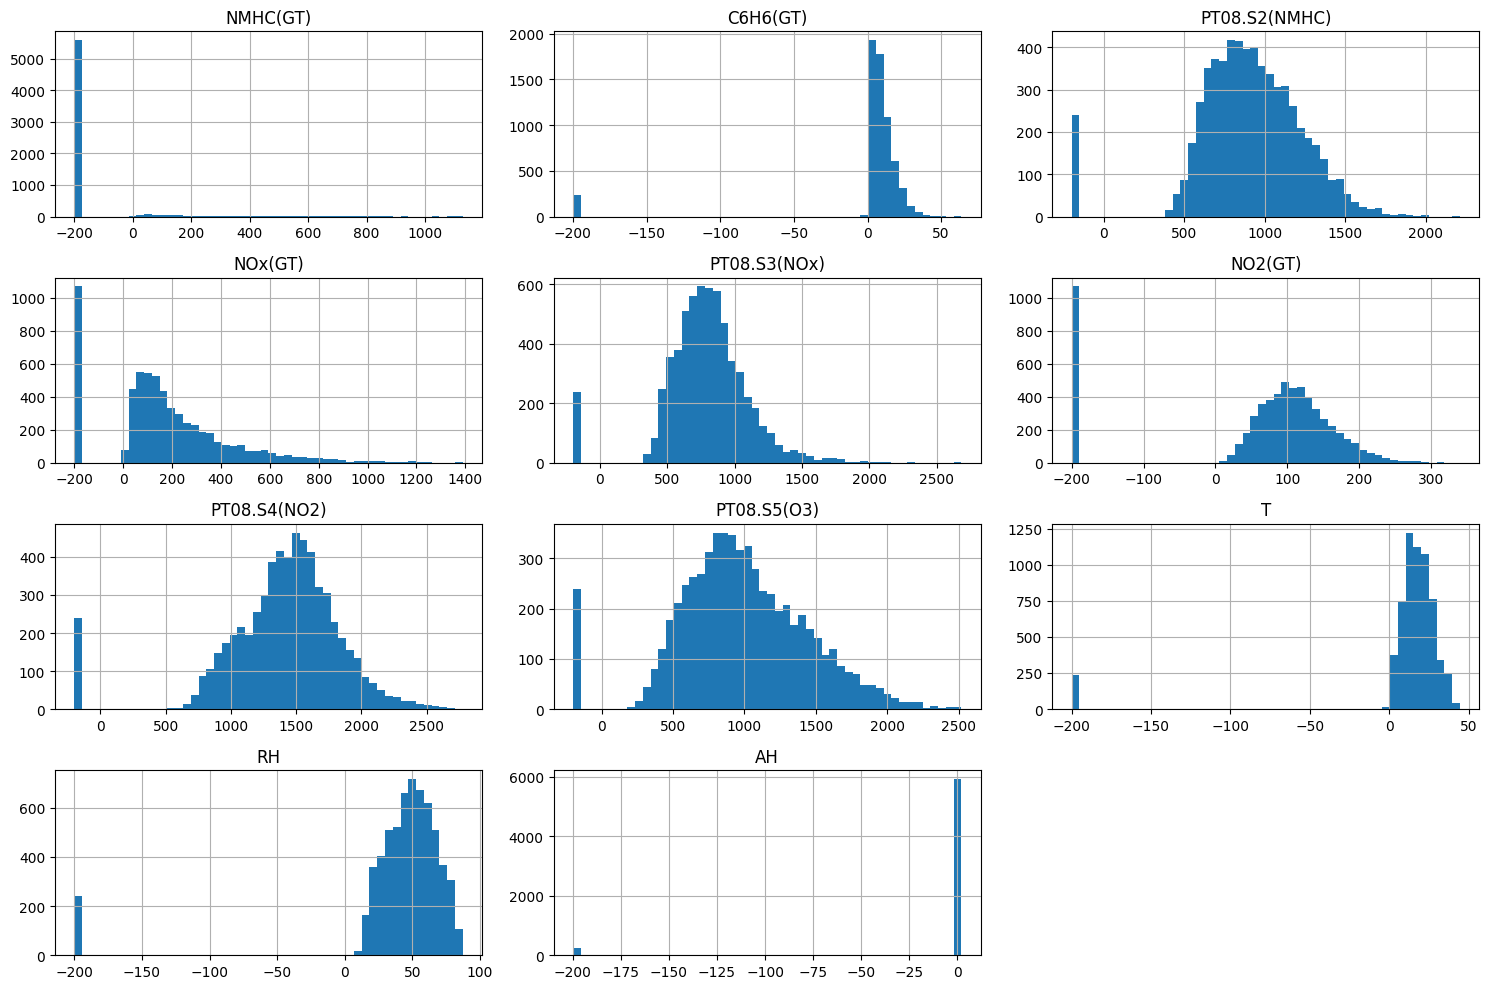

In [143]:
import matplotlib.pyplot as plt

# Plot histograms
X_train.hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

##### Feature Distributions
As we can see, not all the features have a normal distribution (although some of them have quite normal distribution except that they have outliers as well).
- Skewed distributions: For instance, features like C6H6(GT), NOx(GT) appear right skewed
- Outliers: Almost all the features show significant outliers. The extreme negative values on the left seem unusual. For example, Absolute Humidity(AH) should not be negative, which suggests that these outliers could be erroneous data. Similarly, Benzene(C6H6) or other concentration in air cannot be negative.

Normalization or transformation of features seems necessary based on what the histograms reveal. The reasons for this include:
- Normalization: Scaling the data to a specific range seems to be a good idea to handle these features with different scales or units for our models. Features like T(Temperature) and RH(Relative Humidity) have values with drastically different ranges from others, which might impact our model. So bringing features to a common scale ensures that no single feature dominates others.
- Handling outliers: We see there are outlier values in our training data, so standardisation (Z-score normalization) would be useful.

In [144]:
# Apply Z-score Normalization (Standardisation) to train and test set
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std

mean = X_test.mean()
std = X_test.std()
X_test = (X_test - mean) / std

# View the train set after normalization
X_train

,NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,-0.289441,-0.000142,-0.897578,-0.102464,1.319430,0.100469,-0.892367,-1.065368,0.018261,0.198539,0.190623
1,-0.289441,0.215756,0.326564,0.700325,-0.764631,0.645347,-0.034754,0.662151,0.171651,0.216185,0.199801
2,-0.289441,0.133278,-0.055252,0.654010,0.297709,0.708521,-0.965264,-0.193984,-0.051461,-0.111235,0.183314
3,-0.289441,0.387989,0.996927,1.190489,-0.595906,0.898043,0.889324,1.304797,0.380819,0.045613,0.210753
4,-0.289441,0.126000,-0.093142,-0.391931,0.510177,0.139953,-0.079779,-0.764741,0.636468,-0.487670,0.198012
...,...,...,...,...,...,...,...,...,...,...,...
6244,-0.289441,0.058077,-0.477872,0.183144,0.678901,0.361063,-0.793742,-0.610070,-0.009628,0.280884,0.190613
6245,-0.289441,0.002284,-0.871346,-0.457543,1.088215,-0.120640,-0.135524,-0.849701,0.257642,0.474984,0.214826
6246,-0.289441,0.038671,-0.603201,-0.063868,0.269588,0.447927,-0.909519,-0.697208,-0.053785,0.263239,0.188414
6247,-0.289441,0.045948,-0.559481,-0.488420,0.647656,-0.049569,0.068159,-0.283301,0.325041,-0.034772,0.202606


##### Data Transformation
Normalization: I applied standardization (Z-score normalization) to ensure all features have the same scale, making the mean of each feature 0 and the standard deviation 1. This ensures that no feature dominates the regression models due to it's scale.  
I chose Z-score normalization over Max-Min Normalization because normalizing the data using Max-Min Normalization will scale most of the data to a small interval, which means all features have the same scale but it does not handle outliers well. Standardisation is more robust to outliers, so it is preferable over Max-Min Normalization for our case.  
Standardisation allows users to better handle the outliers and facilitate convergence for some computational algorithms like gradient descent, which we will be using for our model.

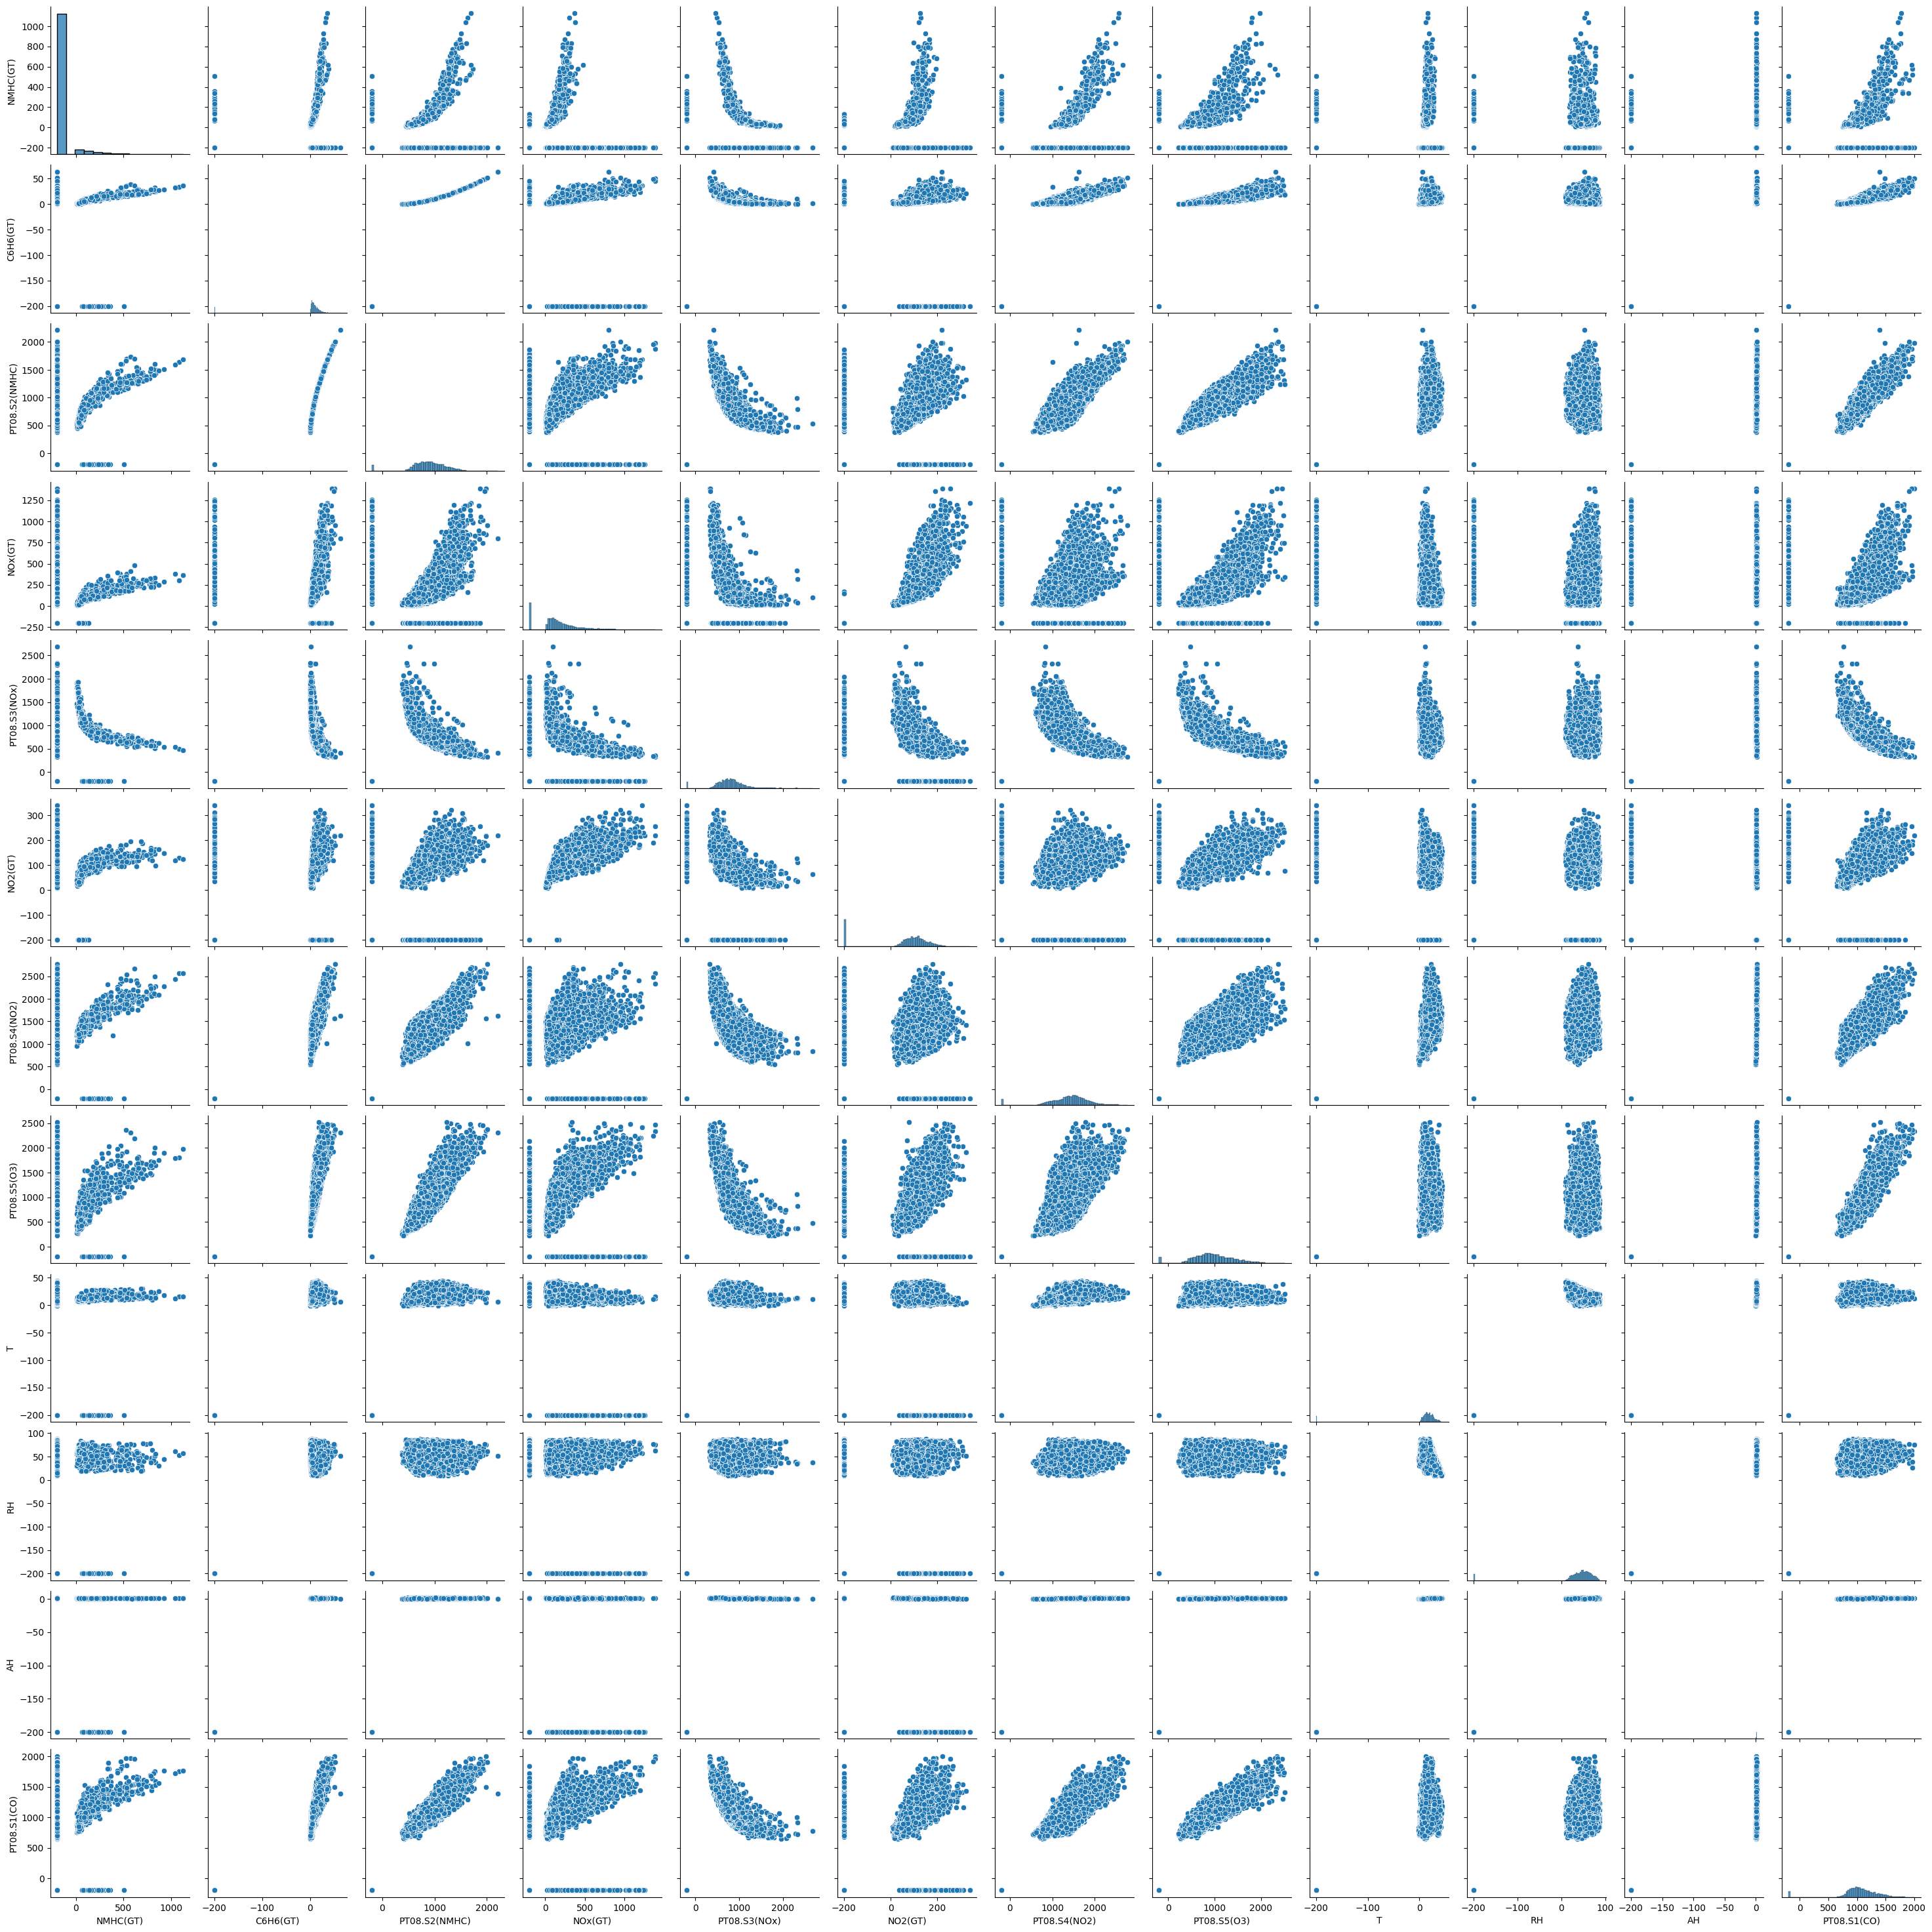

In [145]:
# Plot the pair plot between all the variables
import seaborn as sns

df = data_train[['NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 
                 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 
                 'T', 'RH', 'AH', 'PT08.S1(CO)']]

# Comment the two lines below to avoid higher runtime of the entire notebook
sns.pairplot(df)
plt.show()

Plotted the pair plot between all the feature pairs, then we pick 2 features `NO2(GT)` and `NOx(GT)`, and create a scatter plot to illustrate the correlation between these two features.  
`NOTE`: The code in the above cell to plot the pair plot can be commented after viewing and analysing the pair plots to avoid higher runtime of the entire notebook later.

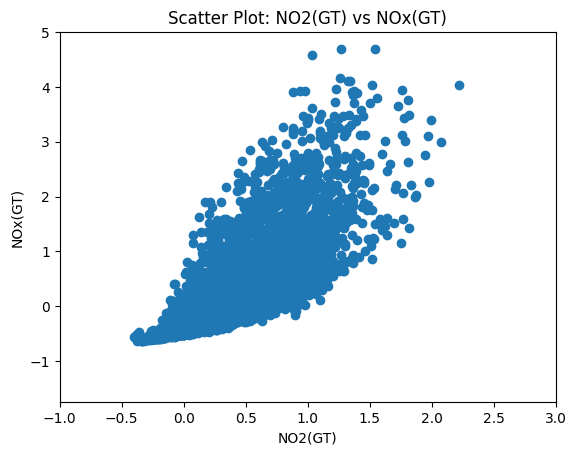

In [146]:
# Select two features
feature_1 = 'NO2(GT)'
feature_2 = 'NOx(GT)'

# Create scatter plot
plt.scatter(X_train[feature_1], X_train[feature_2])
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title(f'Scatter Plot: {feature_1} vs {feature_2}')
plt.xlim(-1, 3)
plt.show()

#### Scatter Plot Analysis
The scatter plot between `NO2(GT)` and `NOx(GT)` shows a certain degree of correlation (although they are not highly correlated), indicating that as the concentration of NO2 increases, NOx concentration might also tend to increase, which makes sense chemically as NOx compounds typically include NO2.

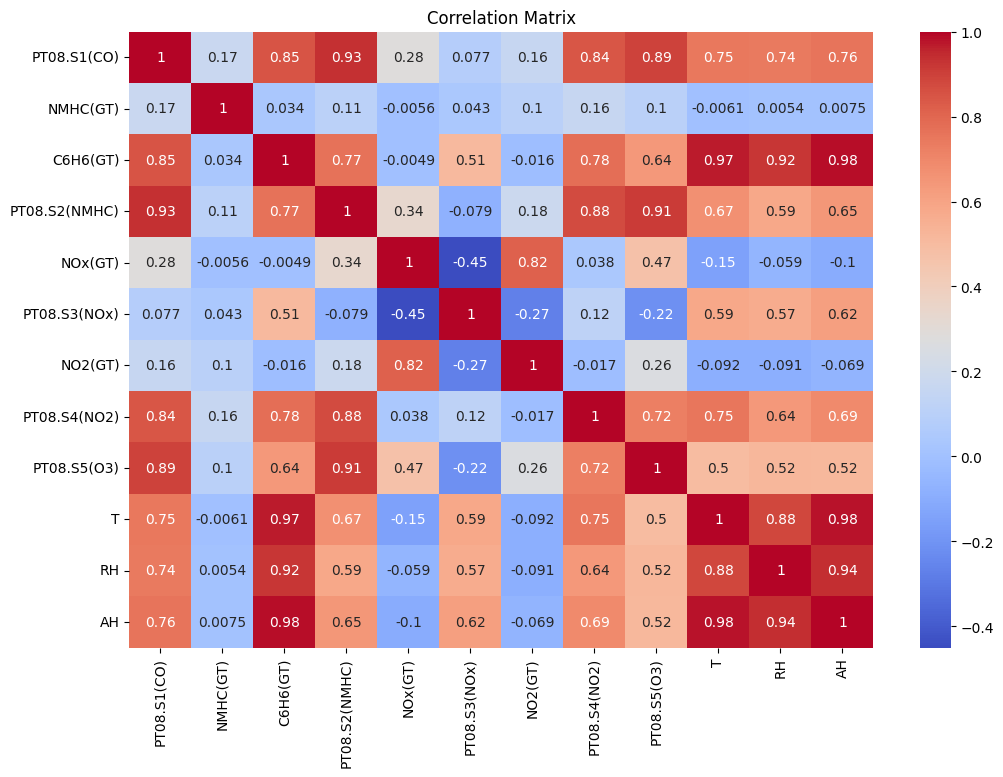

In [147]:
# Compute correlation matrix
C = data_train.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(C, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Correlation Heatmap Analysis

The heatmap above represents the Pearson correlation between all pairs of variables in the training data. The values range from -1 to 1, with positive values indicating a positive correlation and negative values indicating a negative correlation. The color intensity corresponds to the strength of the correlation. Cells with higher positive correlations will have colors closer to red, while negative correlations will be blue.

#### Key Observations:
1. **Strong Positive Correlation**:
    - **Target Variable**: We can see that our target variable `PT08.S1(CO)` is quite strongly correlated to some features like `PT08.S2(NMHC)` (0.93), `PT08.S5(O3)` (0.89), `C6H6(GT)` (0.85) and `PT08.S4(NO2)` (0.84).
    - `PT08.S2(NMHC)` and `PT08.S5(O3)`: These sensors are strongly correlated (0.91), which suggest that these sensors might be detecting similar environmental factors. This might also indicate potential sensor redundancy.
    - `PT08.S2(NMHC)` is strongly correlated with `PT08.S4(NO2)` (0.88), indicating that there is some relationship between the sensor values for NMHC and NO2, which could be related to common air pollution sources. This might also indicate potential sensor redundancy.
    - We can also see that `C6H6(GT)` is very strongly related to `Temperature(T)`, `Absolute Humidity(AH)` and `Relative Humidit(RH)` with a value of 0.97, 0.98 and 0.92 respectively, indicating that increase in the Benzene concentration is likely to increase the temperature, absolute and relative humidity of a place.
    - `Temperature(T)` and `Absolute Humidity(AH)`: Another high correlation exists between these features, indicating temperature and absolute humidity are highly related to each other. In fact, we can notice that all pair among the variables `T`, `AH` and `RH` show a high correlation amongst them, which makes sense as higher temperatures might coincide with higher humidity levels.
    - All sensor responses for `NMHC`, `NOx`, `NO2` and `O3` are also somewhat moderately correlated to Temperature, Absolute and Relative Humidity levels.
    

2. **Moderate Positive Correlation**:
    - **Target Variable**: There is a moderate positive correlation of our target variable `PT08.S1(CO)` with `Temperature(T)` (0.75), `Absolute Humidity(AH)` (0.76) and `Relative Humidit(RH)` (0.74).
    - `NOx(GT)` shows a decent positive correlation with `NO2(GT)` (0.82), indicating that as NOx increases, NO2 also tends to increase, which makes sense chemically as NOx compounds typically include NO2.
    - `C6H6(GT)` and `PT08.S2(NMHC)`: These variables have a moderate correlation (0.77) between them. This suggests that as the hourly averaged Benzene concentration increases, it might also happend that the hourly averaged sensor value for Non Metanic HydroCarbons increases.
    - `C6H6(GT)` and `PT08.S4(NO2)`: A moderate positive correlation (0.78) exists between these two as well, indicating that NO2 concentrations are also related to benzene levels.

3. **Low Correlation**:
    - **Target Variable**: There exists very low correlation of our target variable `PT08.S1(CO)` with `NMHC(GT)` (0.17), `NOx(GT)` (0.28), `PT08.S3(NOx)` (0.077) and `NO2(GT)` (0.16).
    - Low positive and low negative correlation exists between multiple pair of features like -0.0056 for `NMHC(GT)` and `NOx(GT)`, -0.079 for `PT08.S2(NMHC)` and `PT08.S3(NOx)`, 0.038 for `NOx(GT)` and `PT08.S4(NO2)`, 0.0075 for `NMHC(GT)` and `AH` alongwith many other such pairs.

4. **Negative Correlations**:
    - **Target Variable**: We notice that there is no negative correlation of our target variable with any of the features.
    - We also notice that no two features exhibit a strong negative correlation, indicating increase in the concentration of one chemical is not related to decrease in the concentration of another chemical compound.

We also notice that hourly averaged concentration of a chemical is not very strongly related with it's corresponding sensor response, which might indicate defective sensors or other chemicals affecting sensors.


## (c) Linear Regression Implementation

In [148]:
import numpy as np

# Linear Regression model implementation
class LinearRegression:
    def __init__(self):
        self.theta_best = None
    
    def fit(self, X, y):
        n_samples = X.shape[0]
        
        # Add a bias term (column of ones) to the input features
        X_b = np.c_[np.ones((n_samples, 1)), X]

        # Compute the optimal theta using the normal equation
        self.theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    def predict(self, X):
        n_samples = X.shape[0]
        X_b = np.c_[np.ones((n_samples, 1)), X]

        # Make predictions using the learned theta values
        return X_b.dot(self.theta_best)

In the above cell, I implemented a **Linear Regression** model from scratch, following the closed-form solution known as the **Normal Equation**. The implementation consists of two main methods:

1. **`fit` method**: This method is responsible for training the model by finding the optimal model parameters (also known as `theta`). I augmented the input feature matrix `X` with a bias term (a column of ones) to account for the intercept. Then, I used the formula for the **Normal Equation** to compute `theta_best`, which minimizes the cost function (mean squared error) on the training data. The **Normal Equation** is defined as:

$$
\theta_{\text{best}} = (X^T X)^{-1} X^T y
$$

2. **`predict` method**: After training, this method allows us to make predictions on new data. Similarly, I augment the input with a bias term and use the learned `theta_best` to predict the target values.

##### Thought Process
- I opted for the **Normal Equation** approach since it provides a direct analytical solution to linear regression. This method avoids the need for iterative approaches like gradient descent, making it ideal when the dataset is relatively small.
- The design includes a bias term to ensure that the model can fit data with a non-zero intercept.

## (d) Logistic Regression Implementation

In [149]:
# Logistic Regression model implementation
class LogisticRegression:
    def __init__(self, learning_rate=0.0001, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.costs = []
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def compute_cost(self, y, y_predicted):
        # Compute the binary cross-entropy loss
        n_samples = len(y)
        cost = -(1 / n_samples) * np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
        return cost
    
    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descent for parameter optimization
        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute and store the cost
            cost = self.compute_cost(y, y_predicted)
            self.costs.append(cost)
    
    def predict_proba(self, X):
        # Compute probabilities using the sigmoid function
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.vstack((1 - y_predicted, y_predicted)).T
    
    def predict(self, X):
        # Predict class labels (0 or 1) based on the probability threshold of 0.5
        y_predicted_prob = self.predict_proba(X)
        return np.array([1 if i > 0.5 else 0 for i in y_predicted_prob[:, 1]])

This implementation follows the standard **Logistic Regression** algorithm using **Gradient Descent** for parameter optimization. The model predicts binary class labels using the **sigmoid function**:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

The cost function is the **binary cross-entropy loss**, defined as:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

Weights are updated iteratively by computing gradients and adjusting them in the direction that minimizes the loss.

The model predicts class probabilities with a threshold of 0.5 for binary classification.


In [150]:
class Metrics:
    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)
    
    def precision(self, y_true, y_pred):
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        predicted_positives = np.sum(y_pred == 1)
        return true_positives / predicted_positives if predicted_positives > 0 else 0
    
    def recall(self, y_true, y_pred):
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        actual_positives = np.sum(y_true == 1)
        return true_positives / actual_positives if actual_positives > 0 else 0
    
    def f1_score(self, y_true, y_pred):
        precision = self.precision(y_true, y_pred)
        recall = self.recall(y_true, y_pred)
        return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    def rmse(self, y_true, y_pred):
        return np.sqrt(np.mean((y_true - y_pred) ** 2))
    
    def confusion_matrix(self, y_true, y_pred):
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        true_negatives = np.sum((y_true == 0) & (y_pred == 0))
        false_positives = np.sum((y_true == 0) & (y_pred == 1))
        false_negatives = np.sum((y_true == 1) & (y_pred == 0))        
        return np.array([[true_negatives, false_positives],
                         [false_negatives, true_positives]])
    
    def plot_confusion_matrix(self, y_true, y_pred, labels=['Negative', 'Positive']):
        cm = self.confusion_matrix(y_true, y_pred)
        fig, ax = plt.subplots(figsize=(5, 5))
        cax = ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.7)
        fig.colorbar(cax)
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', size='large')

        ax.set_xticks([0, 1])
        ax.set_xticklabels(labels)
        
        ax.set_yticks([0, 1])
        ax.set_yticklabels(labels)
        
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
    
    def plot_regression_results(self, y_true, y_pred):
        plt.figure(figsize=(10, 6))
        plt.scatter(y_true, y_pred, color='blue', label='Predicted vs Actual')
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', lw=2, label='Perfect Fit Line')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Regression: Actual vs Predicted Values')
        plt.legend()
        plt.show()

    def plot_cost_function(self, costs_list, learning_rates):
        plt.figure(figsize=(8, 6))
        for costs, learning_rate in zip(costs_list, learning_rates):
            plt.plot(range(len(costs)), costs, label=f'LR={learning_rate}')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost Function Over Iterations')
        plt.legend()
        plt.grid(True)
        plt.show()

metrics = Metrics()

In the above cell, I implemented a **Metrics** class containing various methods for evaluating both classification and regression models.

##### Classification Metrics:
1. **Accuracy**: Proportion of correct predictions:
   
   $$
   \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Predictions}}
   $$

2. **Precision**: Measures the proportion of positive predictions that are actually correct:

   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$

3. **Recall**: Measures the proportion of actual positives that are correctly predicted:

   $$
   \text{Recall} = \frac{TP}{TP + FN}
   $$

4. **F1 Score**: Harmonic mean of Precision and Recall:

   $$
   F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

5. **Confusion Matrix**: Summarizes classification results, breaking them down into true/false positives and negatives.

6. **Plot Confusion Matrix**: Visual representation of the confusion matrix for better understanding.

##### Regression Metrics:
1. **RMSE** (Root Mean Squared Error): Measures the standard deviation of residuals (prediction errors).
   
   $$
   RMSE = \sqrt{\frac{1}{n} \sum (y_{true} - y_{pred})^2}
   $$

2. **Plot Regression Results**: Displays the scatter plot of predicted vs actual values with a perfect fit line.

##### Additional:
- **Plot Cost Function**: This method plots the cost function (loss) over iterations for different learning rates, helping visualize the convergence behavior during training.


In [151]:
class KFold:
  def __init__(self, n_splits=5):
    self.n_splits=n_splits
  
  def split(self, X, y):
    n_samples = X.shape[0]
    fold_sizes = np.full(self.n_splits, n_samples // self.n_splits, dtype=int)
    fold_sizes[:n_samples % self.n_splits] += 1
    indices = []
    left = 0
    for i in fold_sizes:
      indices.append([left, left + i])
      left += i
    ret = []

    # Create train and test sets for each fold
    for i, (start, end) in enumerate(indices):
        X_test = X[start:end]
        y_test = y[start:end]
        X_train = pd.concat([X[:start], X[end:]])
        y_train = pd.concat([y[:start], y[end:]])
        ret.append([X_train, y_train, X_test, y_test])
    return ret

In the above cell, I implemented a custom **KFold Cross-Validation** class that splits a dataset into training and test sets for each fold. The main method is:

`split` method:
- **n_splits**: Specifies the number of folds (default is 5).
- The dataset is divided into equal (or near-equal) parts, and for each fold, the method creates:
  - **Training set**: Consisting of data from all other folds.
  - **Test set**: Consisting of data from the current fold.

This approach ensures that every data point is used both for training and testing, which helps in assessing the model's performance more reliably.


## (e) Result Analysis - Linear Regression

#### 5-fold cross validation (Linear Regression)

In [152]:
model_linear_regression = LinearRegression()

kf = KFold(n_splits=5)
rmse_values = []
for i, fold in enumerate(kf.split(X_train, y_train)):
    X_train_kf, y_train_kf, X_val_kf, y_val_kf = fold

    # Train the model for current fold
    model_linear_regression.fit(X_train_kf, y_train_kf)

    # Make predictions on validation set for current fold
    y_pred_kf = model_linear_regression.predict(X_val_kf)

    rmse_values.append(metrics.rmse(y_true=y_val_kf, y_pred=y_pred_kf))

avg_rmse = np.mean(rmse_values)
std_rmse = np.std(rmse_values)

print(f"RMSE values for each fold: {rmse_values}")
print(f"Average RMSE: {avg_rmse}")
print(f"Standard Deviation of RMSE: {std_rmse}")


RMSE values for each fold: [70.09770853678819, 72.93173532667775, 67.9145163295476, 72.57087719187234, 72.696822576408]
Average RMSE: 71.24233199225878
Standard Deviation of RMSE: 1.9554630537517308


We performed 5-fold cross-validation on our Linear Regression model. The RMSE (Root Mean Squared Error) was calculated for each fold, which measures the average magnitude of the errors between the predicted and actual values. 

The results showed consistent RMSE values across the folds, suggesting that the model's performance is stable.

#### Metrics on complete training data
Next, we will train our `linear regression` model on the complete training data and:
- analyse the plot of actual vs predicted values on training data
- identify the most informative features based on the coefficient of the model

Plot of Actual vs Predicted Values for the entire training data


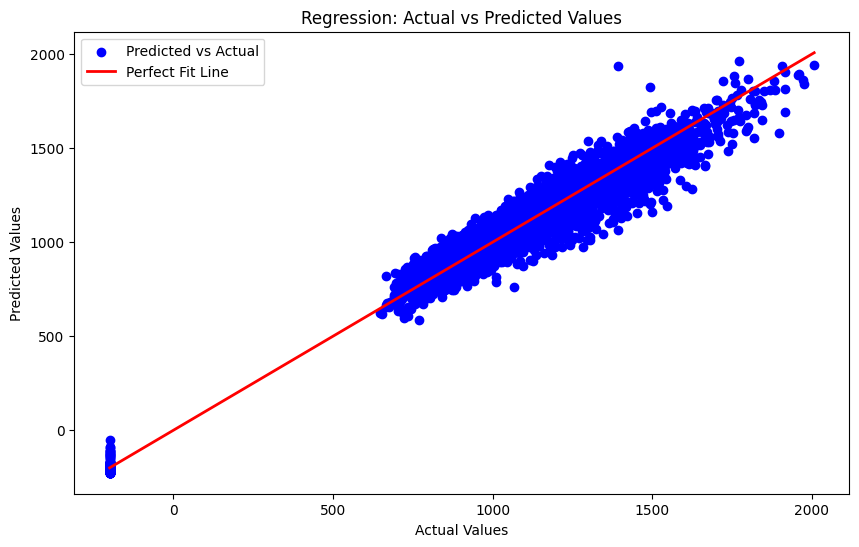

RMSE value on the training data: 71.0793559885694

Bias (Intercept): 1053.137534424105

Coefficients of the linear regression model for each feature:
NMHC(GT): 31.162313173836466
C6H6(GT): 322.6338373355892
PT08.S2(NMHC): 15.815162435456939
NOx(GT): 10.825517005729765
PT08.S3(NOx): -45.598719790694496
NO2(GT): -1.0389390124571212
PT08.S4(NO2): 33.83582802623117
PT08.S5(O3): 90.81053604225733
T: -41.23768013037683
RH: 40.560691159564676
AH: -115.23519322275429


In [153]:
model_linear_regression = LinearRegression()

# Train the model on entire training data
model_linear_regression.fit(X_train, y_train)

# Make predictions
y_pred_linear = model_linear_regression.predict(X_train)

bias = model_linear_regression.theta_best[0]   # First element in theta_best is the bias
coefficients = model_linear_regression.theta_best[1:]

print("Plot of Actual vs Predicted Values for the entire training data")
metrics.plot_regression_results(y_true=y_train, y_pred=y_pred_linear)

print(f"RMSE value on the training data: {metrics.rmse(y_true=y_train, y_pred=y_pred_linear)}\n")

print(f"Bias (Intercept): {bias}\n")
print("Coefficients of the linear regression model for each feature:")
column_names = X_train.columns.to_list()
for col, coef in zip(column_names, coefficients):
    print(f"{col}: {coef}")

The above plot between actual vs predicted values show that our model is decently close to the perfect fit line with an RMSE value of **71.07**.

#### Most Informative Features Based on Coefficients:

The coefficients in a linear regression model represent the expected change in the target variable for a unit change in each feature, assuming all other features remain constant.

- A **positive coefficient** suggests a direct relationship between the feature and the target variable (i.e., as the feature increases, the target variable increases).
- A **negative coefficient** suggests an inverse relationship (i.e., as the feature increases, the target variable decreases).

To identify the **most informative features**, we look at the magnitude of the coefficients. Features with larger absolute coefficients have a stronger influence on the predictions of the model.

From the coefficients printed above:
- `C6H6(GT)` has a coefficient of **322.63**, indicating it has the strongest positive influence on the target variable.
- `AH` has a coefficient of **-115.23**, indicating it has a strong negative influence on the target variable.

Thus, `C6H6(GT)` and `AH` are among the most **informative features** in this model. Other features like `PT08.S5(O3)` with a coefficient of **90.81**, `PT08.S3(NOx)` with **-45.59**, `T` with **-41.23**  and `RH` with **40.56** also have significant impacts.

## (f) Result Analysis - Logistic Regression

#### Cost function curve
Next, we will analyse the cost function curve for different learning rates to choose the learning rate of our logistic regression model for our prediction on the test dataset.

/tmp/ipykernel_575/2870753049.py:16: RuntimeWarning: divide by zero encountered in log
  cost = -(1 / n_samples) * np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
/tmp/ipykernel_575/2870753049.py:16: RuntimeWarning: divide by zero encountered in log
  cost = -(1 / n_samples) * np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))


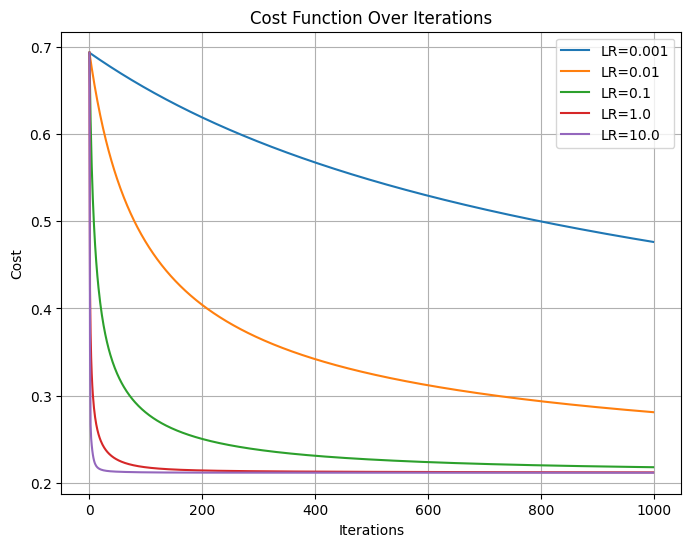

In [154]:
# Binary label for logistic regression
y_train_binary = (y_train > 1000).astype(int)

# Define different learning rates
learning_rates = [0.001, 0.01, 0.1, 1.0, 10.0]
costs_list = []

# Fit the model with different learning rates
for lr in learning_rates:
    model_logistic_regression = LogisticRegression(learning_rate=lr, n_iterations=1000)
    model_logistic_regression.fit(X_train, y_train_binary)
    costs_list.append(model_logistic_regression.costs)

metrics.plot_cost_function(costs_list=costs_list, learning_rates=learning_rates)

### Cost Function Over Iterations for Logistic Regression

The plot above illustrates how the cost function decreases over 1000 iterations for different learning rates (LR). The cost function represents the error or loss in the logistic regression model, and a lower value indicates better performance.

#### Key Observations:

1. **Learning Rate (LR) = 0.001**:
    - The cost decreases very slowly and is still relatively high even after 1000 iterations. This indicates that the learning process is too slow, and the model may not converge within a reasonable number of iterations.
    - **Conclusion**: This learning rate is too small, leading to slow learning and poor performance.

2. **Learning Rate (LR) = 0.01**:
    - The cost function decreases at a faster rate than LR = 0.001 but still doesn't reach the lowest cost after 1000 iterations. While it is better than the smallest learning rate, it is still not optimal.
    - **Conclusion**: This learning rate is also too small for effective learning.

3. **Learning Rate (LR) = 0.1**:
    - The cost decreases significantly within the first 200 iterations and stabilizes around a lower value. The curve shows that this learning rate allows the model to converge more quickly and effectively.
    - **Conclusion**: This learning rate appears to strike a good balance between convergence speed and stability. It could be a viable choice for further training and testing.

4. **Learning Rate (LR) = 1.0**:
    - The cost function decreases rapidly and reaches a low value early. However, it starts to flatten out around 200 iterations, indicating that the model converges very quickly.
    - **Conclusion**: This learning rate is aggressive and works well here. However, there is a risk of overshooting the global minimum, which might affect generalization.

5. **Learning Rate (LR) = 10.0**:
    - The cost decreases almost immediately and becomes constant after a few iterations. This indicates that while the cost function reaches a low value quickly, there may be a risk of divergence or instability in more complex data.
    - **Conclusion**: This learning rate is too high and may cause overfitting or instability, making it unsuitable for use.

#### Choosing the Final Learning Rate:
Based on the observations, **LR = 0.1** appears to be the optimal learning rate. It provides a good balance between convergence speed and achieving a low cost value. While **LR = 1.0** also performs well, it may lead to instability or overshooting in the long term, especially on new or complex data. Therefore, **LR = 0.1** is the safest choice for making predictions on the test data.

#### 5-fold cross validation (Logistic Regression)

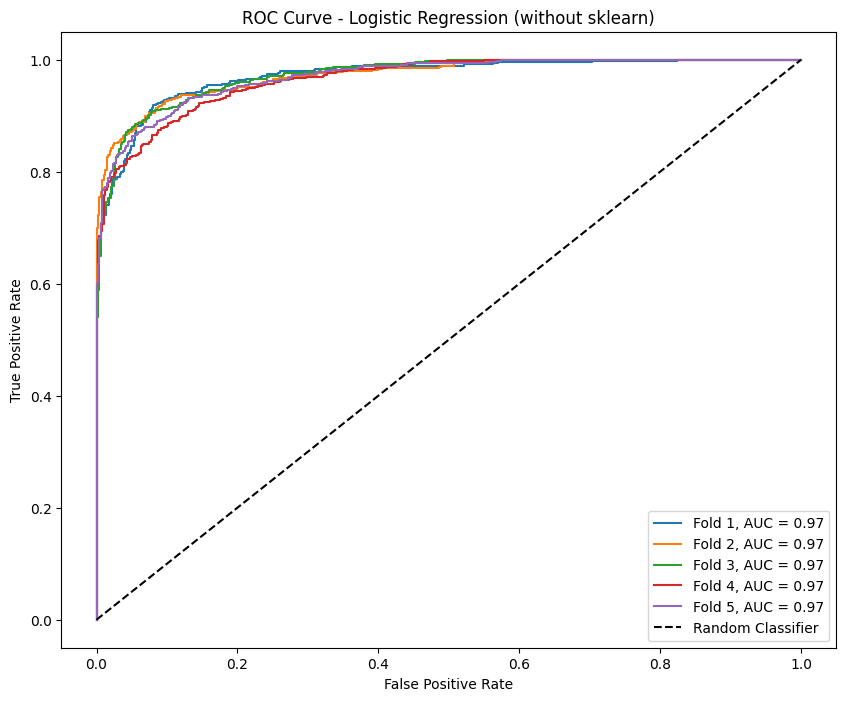

AUC values (area under the curve) for each fold:: [0.9713676737551867, 0.9723360204396281, 0.9724078624078625, 0.9656388152077808, 0.9695444143956731]
Average AUC: 0.9702589572412263

Accuracy values for each fold: [0.9165991902834008, 0.91417004048583, 0.9044534412955466, 0.893030794165316, 0.9051863857374393]
Average Accuracy: 0.9066879703935065
Standard deviation for accuracy: 0.00834242161328583

Precision values for each fold: [0.9269972451790633, 0.9364864864864865, 0.9202702702702703, 0.9157754010695187, 0.9158031088082902]
Average Precision: 0.9230665023627258
Standard deviation for precision: 0.00786489250885832

Recall values for each fold: [0.9308437067773168, 0.9215425531914894, 0.9202702702702703, 0.9084880636604774, 0.9314888010540184]
Average Recall: 0.9225266789907144
Standard deviation for recall: 0.00839803771572191

F1 Score values for each fold: [0.9289164941338854, 0.9289544235924934, 0.9202702702702703, 0.9121171770972039, 0.9235793598954931]
Average F1 Score: 0.9

In [155]:
from sklearn.metrics import roc_curve, roc_auc_score

# Binary label for logistic regression
y_train_binary = (y_train > 1000).astype(int)

model_logistic_regression = LogisticRegression(learning_rate=0.1, n_iterations=1000)

# Initialize lists to store AUC values
auc_values = []

plt.figure(figsize=(10, 8))

accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

kf = KFold(n_splits=5)
for i, fold in enumerate(kf.split(X_train, y_train_binary)):
  X_train_kf, y_train_kf, X_val_kf, y_val_kf = fold
  
  # Train the model
  model_logistic_regression.fit(X_train_kf, y_train_kf)

  # Make predictions
  y_pred_kf = model_logistic_regression.predict(X_val_kf)

  accuracy = metrics.accuracy(y_true=y_val_kf, y_pred=y_pred_kf)
  precision = metrics.precision(y_true=y_val_kf, y_pred=y_pred_kf)
  recall = metrics.recall(y_true=y_val_kf, y_pred=y_pred_kf)
  f1 = metrics.f1_score(y_true=y_val_kf, y_pred=y_pred_kf)
  
  # Append the metrics to the lists
  accuracy_values.append(accuracy)
  precision_values.append(precision)
  recall_values.append(recall)
  f1_values.append(f1)

  # Compute the ROC curve
  y_pred_kf_prob = model_logistic_regression.predict_proba(X_val_kf)[:, 1]
  fpr, tpr, _ = roc_curve(y_val_kf, y_pred_kf_prob)
  auc = roc_auc_score(y_val_kf, y_pred_kf_prob)
  auc_values.append(auc)
  
  # Plot the ROC curve for the current fold
  plt.plot(fpr, tpr, label=f'Fold {len(auc_values)}, AUC = {auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (without sklearn)')
plt.legend(loc='best')
plt.show()

avg_auc = np.mean(auc_values)
print(f"AUC values (area under the curve) for each fold:: {auc_values}")
print(f"Average AUC: {avg_auc}\n")

avg_accuracy = np.mean(accuracy_values)
std_accuracy = np.std(accuracy_values)

avg_precision = np.mean(precision_values)
std_precision = np.std(precision_values)

avg_recall = np.mean(recall_values)
std_recall = np.std(recall_values)

avg_f1 = np.mean(f1_values)
std_f1 = np.std(f1_values)

print(f"Accuracy values for each fold: {accuracy_values}")
print(f"Average Accuracy: {avg_accuracy}") 
print(f"Standard deviation for accuracy: {std_accuracy}\n")
print(f"Precision values for each fold: {precision_values}")
print(f"Average Precision: {avg_precision}")
print(f"Standard deviation for precision: {std_precision}\n")
print(f"Recall values for each fold: {recall_values}")
print(f"Average Recall: {avg_recall}")
print(f"Standard deviation for recall: {std_recall}\n")
print(f"F1 Score values for each fold: {f1_values}")
print(f"Average F1 Score: {avg_f1}")
print(f"Standard deviation for f1 score: {std_f1}\n")



We performed 5-fold cross-validation on our Logistic Regression model. Accuracy, precision, recall, and F1 score were calculated for each fold, providing a comprehensive evaluation of the model's performance.

The results indicate that the model's performance is consistent across different folds, with average values reflecting its overall capability.

#### ROC Curve - Logistic Regression (without sklearn)

We used our implementation of logistic regression to plot the ROC (Receiver Operating Characteristic) curve for each fold during 5-fold cross-validation. The ROC curve shows the trade-off between the true positive rate and false positive rate for different classification thresholds.

The AUC (Area Under the Curve) values for each fold provide a single metric that summarizes the model's performance. The higher the AUC, the better the model distinguishes between the two classes. The average AUC across all folds was `0.97`, which suggests that our logistic regression model performs well in distinguishing between the binary classes.

#### Metrics on complete training data
Next, we will train our `logistic regression` model on the complete training data using `learning rate = 0.1` and `number of iterations = 1000` and:
- calculate the accuracy, precision, recall, f1 score and plot the confusion matrix for the entire training data

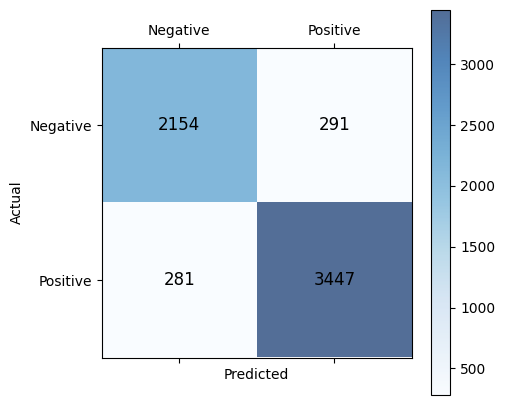

Accuracy for complete training data: 0.9073384092013608
Precision for complete training data: 0.9221508828250401
Recall for complete training data: 0.9246244635193133
F1 score for complete training data: 0.9233860166086257


In [156]:
model_logistic_regression = LogisticRegression(learning_rate=0.1, n_iterations=1000)
model_logistic_regression.fit(X_train, y_train_binary)
y_pred = model_logistic_regression.predict(X_train)

accuracy = metrics.accuracy(y_true=y_train_binary, y_pred=y_pred)
precision = metrics.precision(y_true=y_train_binary, y_pred=y_pred)
recall = metrics.recall(y_true=y_train_binary, y_pred=y_pred)
f1 = metrics.f1_score(y_true=y_train_binary, y_pred=y_pred)

metrics.plot_confusion_matrix(y_true=y_train_binary, y_pred=y_pred)

print(f"Accuracy for complete training data: {accuracy}")
print(f"Precision for complete training data: {precision}")
print(f"Recall for complete training data: {recall}")
print(f"F1 score for complete training data: {f1}")

## (g) ROC Curve - Logistic Regression (with sklearn)

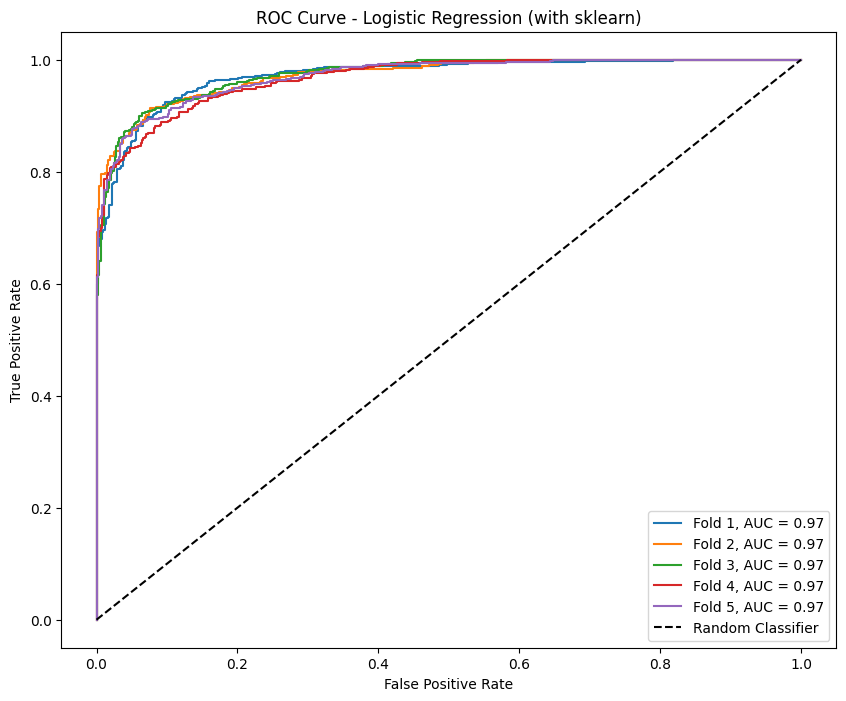

AUC values (area under the curve) for each fold:: [0.9714162992738589, 0.9726966873706003, 0.9737128037128038, 0.9676530725022104, 0.9703682130226753]
Average AUC: 0.9711694151764296

Accuracy values for each fold: [0.9125506072874494, 0.9101214574898785, 0.9109311740890689, 0.8938411669367909, 0.9051863857374393]
Average Accuracy: 0.9065261583081252
Standard deviation for accuracy: 0.006801886831948121

Precision values for each fold: [0.9161028416779432, 0.9302013422818792, 0.9245283018867925, 0.9136786188579017, 0.9147286821705426]
Average Precision: 0.9198479573750118
Standard deviation for precision: 0.006440369736605607

Recall values for each fold: [0.9363762102351314, 0.9215425531914894, 0.927027027027027, 0.9124668435013262, 0.932806324110672]
Average Recall: 0.9260437916131293
Standard deviation for recall: 0.00846229448316235

F1 Score values for each fold: [0.9261285909712723, 0.9258517034068136, 0.9257759784075573, 0.9130723291307232, 0.923679060665362]
Average F1 Score: 0

In [157]:
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Initialize the logistic regression model from sklearn
model_sklearn_logistic_regression = SklearnLogisticRegression()

# Initialize lists to store AUC values
auc_values = []
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

plt.figure(figsize=(10, 8))

kf = KFold(n_splits=5)
for i, fold in enumerate(kf.split(X_train, y_train_binary)):
    X_train_kf, y_train_kf, X_val_kf, y_val_kf = fold
    
    # Train the model
    model_sklearn_logistic_regression.fit(X_train_kf, y_train_kf)

    # Make predictions
    y_pred_kf = model_sklearn_logistic_regression.predict(X_val_kf)

    accuracy = metrics.accuracy(y_true=y_val_kf, y_pred=y_pred_kf)
    precision = metrics.precision(y_true=y_val_kf, y_pred=y_pred_kf)
    recall = metrics.recall(y_true=y_val_kf, y_pred=y_pred_kf)
    f1 = metrics.f1_score(y_true=y_val_kf, y_pred=y_pred_kf)
    
    # Append the metrics to the lists
    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)
    
    # Predict probabilities for the validation set
    y_pred_kf_prob = model_sklearn_logistic_regression.predict_proba(X_val_kf)[:, 1]
    
    # Compute the ROC curve
    fpr, tpr, _ = roc_curve(y_val_kf, y_pred_kf_prob)
    auc = roc_auc_score(y_val_kf, y_pred_kf_prob)
    auc_values.append(auc)
    
    # Plot the ROC curve for the current fold
    plt.plot(fpr, tpr, label=f'Fold {len(auc_values)}, AUC = {auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (with sklearn)')
plt.legend(loc='best')
plt.show()

avg_auc = np.mean(auc_values)
print(f"AUC values (area under the curve) for each fold:: {auc_values}")
print(f"Average AUC: {avg_auc}\n")

avg_accuracy = np.mean(accuracy_values)
std_accuracy = np.std(accuracy_values)

avg_precision = np.mean(precision_values)
std_precision = np.std(precision_values)

avg_recall = np.mean(recall_values)
std_recall = np.std(recall_values)

avg_f1 = np.mean(f1_values)
std_f1 = np.std(f1_values)

print(f"Accuracy values for each fold: {accuracy_values}")
print(f"Average Accuracy: {avg_accuracy}") 
print(f"Standard deviation for accuracy: {std_accuracy}\n")
print(f"Precision values for each fold: {precision_values}")
print(f"Average Precision: {avg_precision}")
print(f"Standard deviation for precision: {std_precision}\n")
print(f"Recall values for each fold: {recall_values}")
print(f"Average Recall: {avg_recall}")
print(f"Standard deviation for recall: {std_recall}\n")
print(f"F1 Score values for each fold: {f1_values}")
print(f"Average F1 Score: {avg_f1}")
print(f"Standard deviation for f1 score: {std_f1}\n")

### Comparison of Logistic Regression Models (With and Without Scikit-Learn)

We have implemented logistic regression using two different approaches:
1. **Custom Implementation**: A manually implemented logistic regression model from scratch.
2. **Scikit-Learn Implementation**: The logistic regression model from the `sklearn` library.

We performed 5-fold cross-validation for both models, plotted the ROC curves for each fold, and computed the Area Under the Curve (AUC) for each fold. The metrics obtained for both implementations are compared below.

#### ROC Curves Comparison
The ROC curves for both the models are very similar, so ROC curve obtained using `logistic regression` from `sklearn` is consistent with ROC curve obtained from our implementation of `logistic regression` model.

#### Results and Metrics Comparison
The following are the key metrics for each model across the 5-folds of cross-validation that we obtained:

| **Metric**            | **Custom Implementation**     | **Scikit-Learn Implementation** |
|-----------------------|-------------------------------|---------------------------------|
| **AUC (avg)**         | 0.9703                        | 0.9712                          |
| **Accuracy (avg)**    | 0.9067                        | 0.9065                          |
| **Accuracy (std)**    | 0.0083                        | 0.0068                          |
| **Precision (avg)**   | 0.9231                        | 0.9198                          |
| **Precision (std)**   | 0.0079                        | 0.0064                          |
| **Recall (avg)**      | 0.9225                        | 0.9260                          |
| **Recall (std)**      | 0.0084                        | 0.0085                          |
| **F1 Score (avg)**    | 0.9228                        | 0.9229                          |
| **F1 Score (std)**    | 0.0063                        | 0.0050                          |

#### Analysis of Results

- **AUC (Area Under the Curve)**: The AUC values for both models are nearly identical across all folds, with an average of ~0.97. This shows that both models have excellent classification performance.
- **Accuracy**: The average accuracy for both models is very similar (~0.906).
- **Precision and Recall**: The precision and recall values are also quite close between the two implementations.
- **F1 Score**: Both models have almost identical F1 scores (~0.923), indicating that the balance between precision and recall is consistent across implementations.

### Conclusion

The results obtained from the custom logistic regression model are highly consistent with those obtained using the `LogisticRegression` model from `scikit-learn`. Both models show similar AUC values, accuracy, precision, recall, and F1 scores across the 5-fold cross-validation. This consistency suggests that the custom implementation of logistic regression is functioning correctly and performs comparably to the standard library implementation.

#### Metrics on complete training data using logistic regression from sklearn
Next, we will train the logistic regression model from sklearn on the entire training data and obtain the metrics for the same.

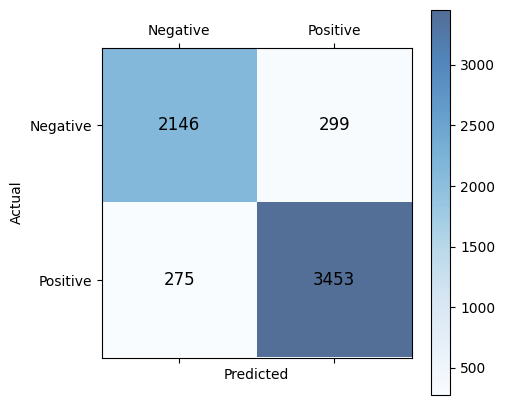

Accuracy for complete training data: 0.9070144176251418
Precision for complete training data: 0.9203091684434968
Recall for complete training data: 0.9262339055793991
F1 score for complete training data: 0.9232620320855615


In [158]:
model_sklearn_logistic_regression = SklearnLogisticRegression()
model_sklearn_logistic_regression.fit(X_train, y_train_binary)
y_pred = model_sklearn_logistic_regression.predict(X_train)

accuracy = metrics.accuracy(y_true=y_train_binary, y_pred=y_pred)
precision = metrics.precision(y_true=y_train_binary, y_pred=y_pred)
recall = metrics.recall(y_true=y_train_binary, y_pred=y_pred)
f1 = metrics.f1_score(y_true=y_train_binary, y_pred=y_pred)

metrics.plot_confusion_matrix(y_true=y_train_binary, y_pred=y_pred)

print(f"Accuracy for complete training data: {accuracy}")
print(f"Precision for complete training data: {precision}")
print(f"Recall for complete training data: {recall}")
print(f"F1 score for complete training data: {f1}")

The reults of logistic regression using sklearn on the entire training data is also very consistent with the results from our implementation of logistic regression, which should be the case since we have already shown that the results are highly consistent for 5-fold cross validation on both the models.

## (h) Inference - Linear and Logistic Regression

In [159]:
model_linear_regression = LinearRegression()
model_logistic_regression = LogisticRegression(learning_rate=0.1, n_iterations=1000)

# Train the linear regression model on entire available training data
model_linear_regression.fit(X_train, y_train)

# Train the logistic regression model on entire available training data
model_logistic_regression.fit(X_train, y_train_binary)

# Predict the test set with the linear regression model
y_pred_linear = model_linear_regression.predict(X_test)

# Predict the test set with the logistic regression model
y_pred_logistic = model_logistic_regression.predict(X_test)

# Create a DataFrame to save the predictions
predictions_df = pd.DataFrame({
    'pred_linear': y_pred_linear,
    'pred_logistic': y_pred_logistic
})

# Current working directory
cwd = os.getcwd()

# Relative paths
output_path = os.path.join(cwd, '..', 'predictions', 'Prakhar_Suryavansh_preds.csv')

# Save the predictions to a CSV file
predictions_df.to_csv(output_path, index=False)


We used our trained Linear and Logistic Regression models to predict the `PT08.S1(CO)` values on the test dataset. The predictions were saved in a CSV file with two columns: `pred_linear` for the linear regression predictions and `pred_logistic` for the logistic regression predictions.

You can find the predictions file at the following relative path: `../predictions/Prakhar_Suryavansh_preds.csv`

**Thank you!**